In [3]:
%matplotlib inline

In [32]:
import numpy as np
import pandas as pd
import sigflux
from sigflux.wave import cwtlets
from scipy import signal

import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, imshow, scatter
from matplotlib import rcParams

In [97]:
df = pd.read_csv('eeg.csv', index_col=0)
# df.drop([5,6,7], axis=1, inplace=True)
df['dt'] = pd.to_datetime(df['time'])
df.set_index('dt', inplace=True)
df.drop('time', axis=1, inplace=True)
print(df.dtypes)
df.head()

ch0    float64
ch1    float64
ch2    float64
ch3    float64
ch4    float64
dtype: object


,ch0,ch1,ch2,ch3,ch4
dt,,,,,
2017-09-29 21:26:54.694562560,826.007324,850.183167,826.007324,831.648376,869.926758
2017-09-29 21:26:54.695251712,883.223450,850.989014,823.992676,849.377319,871.135559
2017-09-29 21:26:54.695875840,882.014648,846.959717,823.589722,846.153870,891.282043
2017-09-29 21:26:54.696532992,828.424927,840.109863,828.424927,809.487183,884.835144
2017-09-29 21:26:54.697192192,815.934082,838.095215,828.424927,811.098877,871.538452


In [98]:
df -= df.mean()

In [99]:
df = df.clip(-250,250)

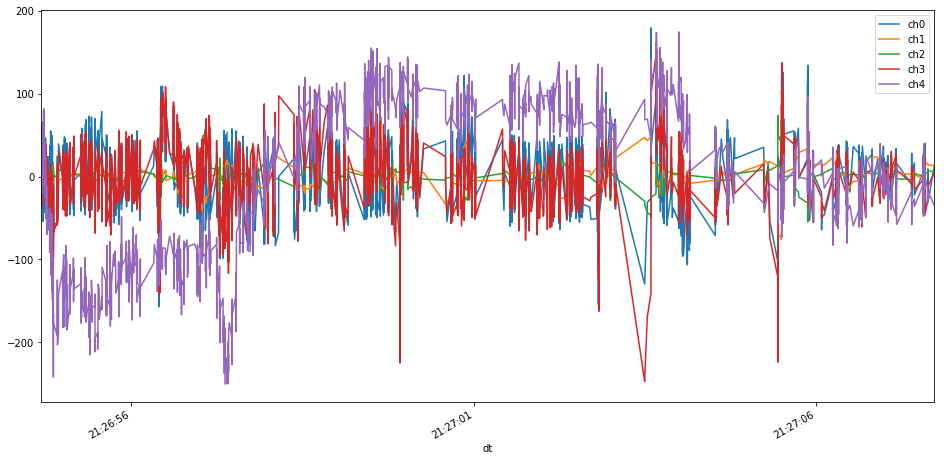

In [100]:
df.plot()

In [51]:
widths = np.linspace(1,16, 30)**2
wt = sigflux.cwt(df.as_matrix()[:,1], signal.ricker, widths)

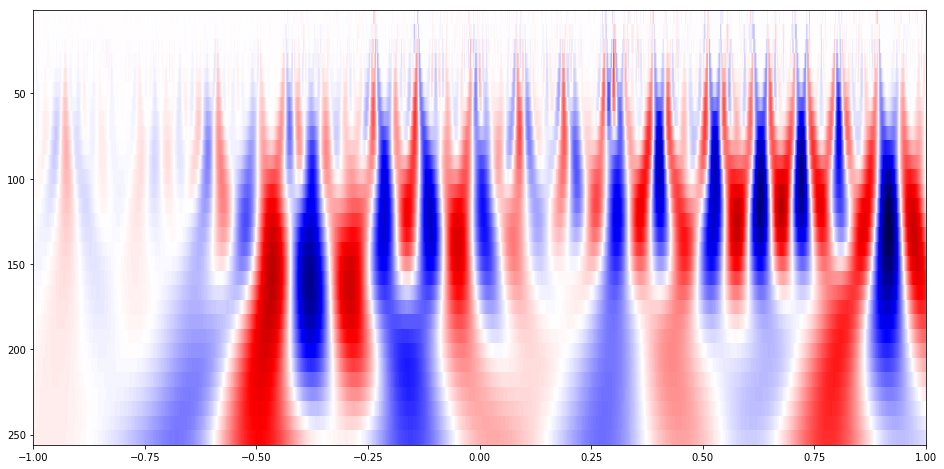

In [52]:
rcParams['figure.figsize'] = (16,8)
img = wt
plt.imshow(img, extent=[-1, 1, widths[-1], widths[0]], cmap='seismic', aspect='auto',
            vmax=abs(img).max(), vmin=-abs(img).max())

In [57]:
df.tail().append([list(range(5))])

,0,1,2,3,4
4990,17.348044,118.464773,-6.000338,9.412698,-110.056934
4991,22.989035,171.651601,-0.359286,13.039041,-99.580738
4992,15.736288,173.666250,2.461209,8.203897,-89.104542
4993,-4.410196,124.105764,2.058316,9.815591,-121.741932
4994,6.066000,121.688223,0.043668,19.082986,-118.115589
0,0.000000,1.000000,2.000000,3.000000,4.000000


In [72]:
argsize=5
chs = list(range(argsize))
dff = pd.DataFrame([[float(0) for n in chs]], columns=['ch{}'.format(n) for n in chs])
packet = pd.DataFrame([[float(0) for n in chs]], columns=['ch{}'.format(n) for n in chs])
dff = dff.append(packet)
dff

,ch0,ch1,ch2,ch3,ch4
0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0


In [77]:
class EEGHandlerDF:
    def __init__(self, filename='eeg.csv', dumprate=100, argsize=5):
        self.filename = filename
        self.dumprate = dumprate  # ratio to which write to file
        self.argsize = argsize
        chs = list(range(argsize))
        self.header = ['ch{}'.format(n) for n in chs]
        self.data = pd.DataFrame(None, columns=self.header)
        self.packet = pd.DataFrame(None, columns=self.header)

        self.i = 0
        
    def handle(self):
        packet = pd.DataFrame([[float(0) for n in chs]], columns=['ch{}'.format(n) for n in chs])
        self.data = self.data.append(packet)

        
e = EEGHandlerDF()
e.handle()
e.handle()
e.data

,ch0,ch1,ch2,ch3,ch4
0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0


In [79]:
packet

,ch0,ch1,ch2,ch3,ch4
0,0.0,0.0,0.0,0.0,0.0


In [85]:
all(dff.columns == packet.columns)

True

In [86]:
import signal as ossignal

In [88]:
ossignal.SIGKILL

<Signals.SIGKILL: 9>

In [89]:
import os

In [ ]:
os.kill()